In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torchsummary import summary

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
num_epochs = 4
batch_size = 4
learning_rate = 0.001

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                        transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5]),
                                ])

In [ ]:
train_dataset = torchvision.datasets.CIFAR100(root="data", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR100(root="data", train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

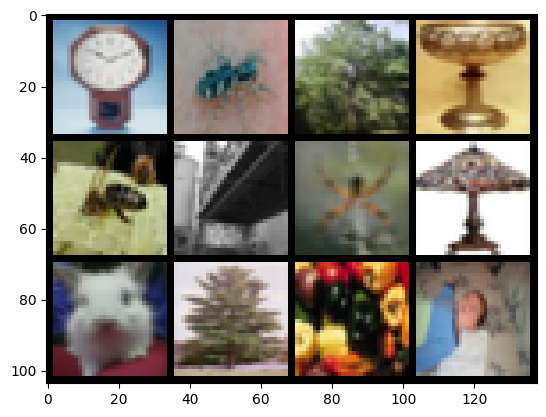

Etiquetas: tensor([22, 79, 59, 28,  6, 12, 79, 40, 65, 59, 83, 11])


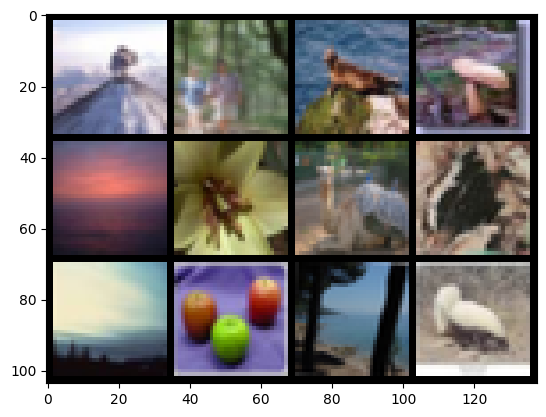

Etiquetas: tensor([49, 33, 72, 51, 71, 92, 15, 14, 23,  0, 71, 75])


In [ ]:
import torchvision.utils as vutils

# Función para visualizar una imagen
def show_image(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), interpolation='nearest')
    plt.show()

# Visualizar algunas muestras del conjunto de entrenamiento
batch_iterator = iter(train_loader)
images_train, labels_train = next(batch_iterator)

# Mostrar las imágenes
img_grid = vutils.make_grid(images_train, nrow=4, padding=2, normalize=True)
show_image(img_grid)
print('Etiquetas:', labels_train)

# Visualizar algunas muestras del conjunto de prueba
batch_iterator = iter(test_loader)
images, labels = next(batch_iterator)

# Mostrar las imágenes
img_grid = vutils.make_grid(images, nrow=4, padding=2, normalize=True)
show_image(img_grid)
print('Etiquetas:', labels)

In [ ]:
print(images.shape)

torch.Size([12, 3, 32, 32])


Dimensiones -> [4,3,32,32]

In [ ]:
class NeuronalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.dop = nn.Dropout(0.3)
    self.conv1 = nn.Conv2d(3,6,5) # tenemos de entrada 3, salida 16 y un filtro de 5, por lo que se disminuye a 28
    self.pool = nn.MaxPool2d(2,2) # se reduce a la mitad 14
    self.conv2 = nn.Conv2d(6,12,5) # despues del filtro queda en 10, y despues de un maxpooling queda en 60, ya que como no puede ser decimal se toma el que este por encima
    self.fc = nn.Linear(12*5*5,120)
    self.fc1 = nn.Linear(120,100)


  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x))) # (32-4)/2 = 14
    x = self.pool(F.relu(self.conv2(x))) # (14-4)/2 = 5
    x = x.view(-1, 12*5*5)
    x = F.relu(self.fc(x))
    x = self.fc1(x)
    return x




In [ ]:
model = NeuronalNetwork().to(device)

In [ ]:
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 12, 10, 10]           1,812
         MaxPool2d-4             [-1, 12, 5, 5]               0
            Linear-5                  [-1, 120]          36,120
            Linear-6                  [-1, 100]          12,100
Total params: 50,488
Trainable params: 50,488
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 0.19
Estimated Total Size (MB): 0.26
----------------------------------------------------------------


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=0.001)

In [ ]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

Epoch [1/4], Step [2000/12500], Loss: 4.5643
Epoch [1/4], Step [4000/12500], Loss: 4.6397
Epoch [1/4], Step [6000/12500], Loss: 4.5844
Epoch [1/4], Step [8000/12500], Loss: 4.6041
Epoch [1/4], Step [10000/12500], Loss: 4.6446
Epoch [1/4], Step [12000/12500], Loss: 4.6290
Epoch [2/4], Step [2000/12500], Loss: 4.6677
Epoch [2/4], Step [4000/12500], Loss: 4.5211
Epoch [2/4], Step [6000/12500], Loss: 4.9269
Epoch [2/4], Step [8000/12500], Loss: 4.6274
Epoch [2/4], Step [10000/12500], Loss: 4.4505
Epoch [2/4], Step [12000/12500], Loss: 4.2846
Epoch [3/4], Step [2000/12500], Loss: 4.3129
Epoch [3/4], Step [4000/12500], Loss: 4.5251
Epoch [3/4], Step [6000/12500], Loss: 4.4527
Epoch [3/4], Step [8000/12500], Loss: 3.6785
Epoch [3/4], Step [10000/12500], Loss: 3.5688
Epoch [3/4], Step [12000/12500], Loss: 4.7311
Epoch [4/4], Step [2000/12500], Loss: 3.5150
Epoch [4/4], Step [4000/12500], Loss: 3.9522
Epoch [4/4], Step [6000/12500], Loss: 4.7138
Epoch [4/4], Step [8000/12500], Loss: 4.6563
Epoc

In [ ]:
clases = ('apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm')


In [ ]:
with torch.no_grad(): # Se deshabilita el siguimiento de los gradientes
    for images, labels in test_loader:
        images = images.to(device) # cargamos a dispositivo
        labels = labels.to(device) # cargamos a dispositivo
        outputs = model(images) # resultadp

        # Calcula las predicciones correctas comparando y_pred con y_true
        correct_predictions = torch.eq(torch.argmax(outputs, dim=1), labels).sum().item()

        # Calcula el total de muestras
        total_samples = labels.size(0)

        # Calcula la precisión dividiendo las predicciones correctas por el total de muestras
        accuracy = correct_predictions / total_samples

        print("Accuracy:", accuracy)

Accuracy: 0.25
Accuracy: 0.0
Accuracy: 0.5
Accuracy: 0.0
Accuracy: 0.5
Accuracy: 0.25
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.25
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.25
Accuracy: 0.5
Accuracy: 0.0
Accuracy: 0.5
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.25
Accuracy: 0.25
Accuracy: 0.0
Accuracy: 0.25
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.25
Accuracy: 0.5
Accuracy: 0.25
Accuracy: 0.0
Accuracy: 0.5
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.75
Accuracy: 0.25
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.25
Accuracy: 0.25
Accuracy: 0.5
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.25
Accuracy: 0.5
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.25
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.25
Accuracy: 0.0
Accuracy: 0.25
Accuracy: 0.25
Accuracy: 0.5
Accuracy: 0.0
Accuracy: 0.25
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.25
Accuracy: 0.0
Accuracy: 0.0
Accuracy: 0.0
